In [1]:
pip install qiskit


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import qiskit


In [3]:
from qiskit import *

In [4]:
# Create a quantum circuit
qc = QuantumCircuit(2, 2)


In [5]:
qc.draw()#draw the circuit

q_0: 
     
q_1: 
     
c: 2/

In [6]:
qc.h(0)#apply hadarmad gate on first qubit

In [7]:
qc.draw()#draw the circuit

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────
          
c: 2/═════

In [8]:
#apply cnot
qc.cx(0,1)#control is 0 and target is 1

In [9]:
qc.draw()#draw the circuit

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════

In [10]:
#measurement
qc.measure([0,1],[0,1])

In [11]:
qc.draw()#draw the circuit

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

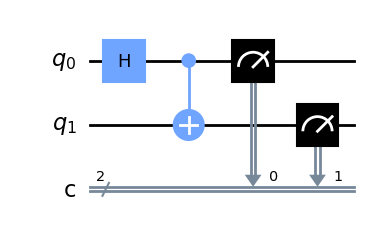

In [12]:
qc.draw(output="mpl")

In [15]:
#simulate the circuit
simulator=Aer.get_backend('qasm_simulator')

In [17]:
job=execute(qc,backend=simulator,shots=1000)#default shots=1024

In [22]:
result=job.result()

In [25]:
result

Result(backend_name='qasm_simulator', backend_version='0.12.0', qobj_id='', job_id='b8700534-581c-4e19-af58-5cf539d7dcbe', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 499, '0x0': 501}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata=None, n_qubits=2, name='circuit-114', qreg_sizes=[['q', 2]]), status=DONE, seed_simulator=1874010019, metadata={'batched_shots_optimization': False, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'sample_measure_time': 0.0026184, 'input_qubit_map': [[0, 0], [1, 1]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 16, 'fusion': {'enabled': False}}, time_taken=0.0067647)], date=2023-06-02T12:19:32.324079, status=COMPLETED, header=None, metadata={'parallel_experiments': 1, 'omp_enabled': True, 'max_memory_mb': 161

In [26]:
#get the counts
counts=result.get_counts(qc)

In [27]:
print(counts)

{'11': 499, '00': 501}


In [28]:
from qiskit.visualization import plot_histogram

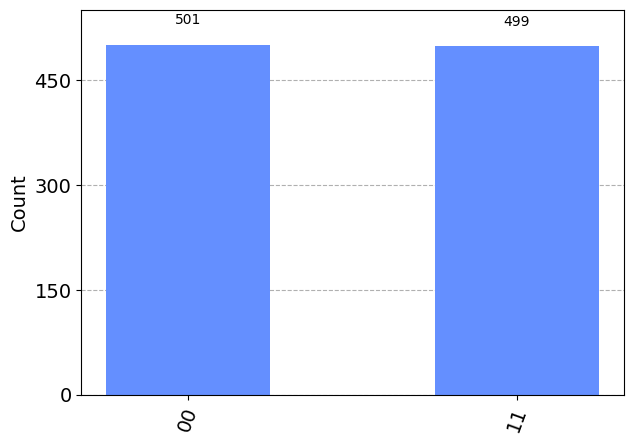

In [29]:
plot_histogram(counts)

In [38]:
#converge counts to probabilities
total_shots=sum(counts.values())
probabilities={outcome:count/total_shots for outcome,count in counts.items()}

In [39]:
probabilities

{'11': 0.499, '00': 0.501}

In [34]:
total_shots

1000